# 1) Prepare a classification model using Naive Bayes for salary data 


In [18]:
import re
import numpy as np
import pandas as pd
import seaborn as sns

In [11]:
saltrain = pd.read_csv("SalaryData_Train.csv")
saltrain

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [12]:
from sklearn import preprocessing

In [13]:
label_encoder = preprocessing.LabelEncoder()
saltrain['workclass']= label_encoder.fit_transform(saltrain['workclass'])
saltrain['education']= label_encoder.fit_transform(saltrain['education'])
saltrain['workclass']= label_encoder.fit_transform(saltrain['workclass'])
saltrain['maritalstatus']= label_encoder.fit_transform(saltrain['maritalstatus'])
saltrain['occupation']= label_encoder.fit_transform(saltrain['occupation'])
saltrain['relationship']= label_encoder.fit_transform(saltrain['relationship'])
saltrain['race']= label_encoder.fit_transform(saltrain['race'])
saltrain['sex']= label_encoder.fit_transform(saltrain['sex'])
saltrain['native']= label_encoder.fit_transform(saltrain['native'])
saltrain['Salary']= label_encoder.fit_transform(saltrain['Salary'])

In [14]:
saltrain

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [15]:
saltrain.dtypes

age              int64
workclass        int64
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='workclass'>

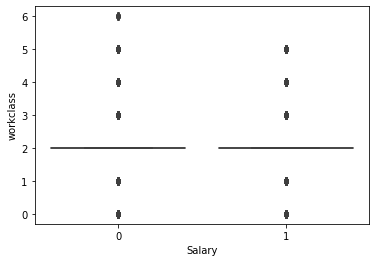

In [24]:
#Checking for relevance of different features with salary data to confirm whether it can classify the data
sns.boxplot(saltrain.Salary,saltrain.workclass)

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='age'>

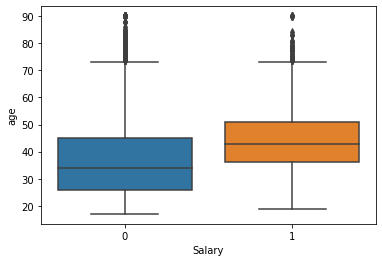

In [27]:
sns.boxplot(saltrain.Salary,saltrain.age)

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='education'>

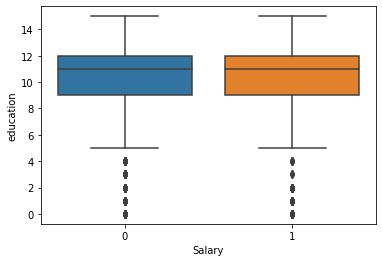

In [25]:
sns.boxplot(saltrain.Salary,saltrain.education)

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='educationno'>

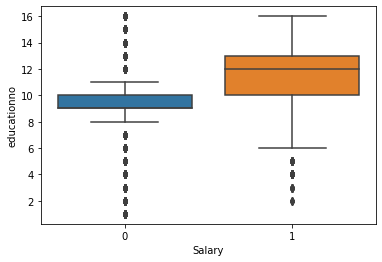

In [26]:
sns.boxplot(saltrain.Salary,saltrain.educationno)

In [38]:
#educationno is somehow classifying the data compared with other features

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='maritalstatus'>

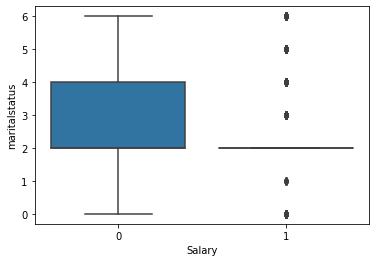

In [28]:
sns.boxplot(saltrain.Salary,saltrain.maritalstatus)

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='occupation'>

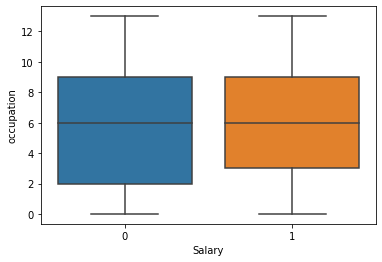

In [29]:
sns.boxplot(saltrain.Salary,saltrain.occupation)

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='relationship'>

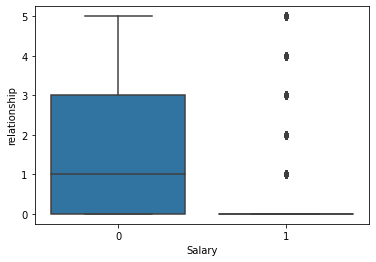

In [30]:
sns.boxplot(saltrain.Salary,saltrain.relationship)

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='race'>

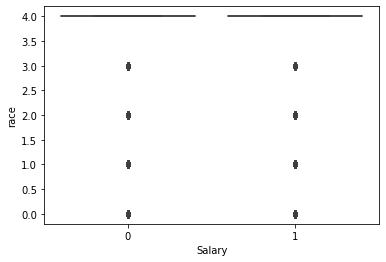

In [31]:
sns.boxplot(saltrain.Salary,saltrain.race)

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='sex'>

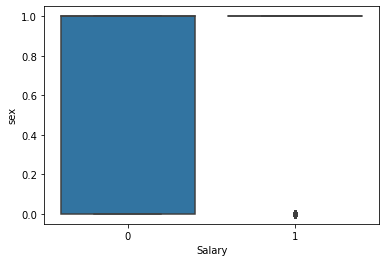

In [32]:
sns.boxplot(saltrain.Salary,saltrain.sex)

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='capitalgain'>

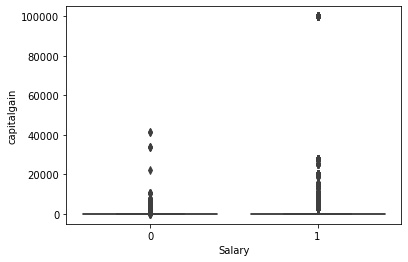

In [33]:
sns.boxplot(saltrain.Salary,saltrain.capitalgain)

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='capitalloss'>

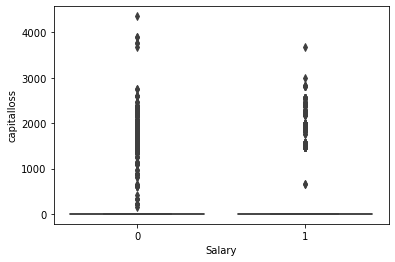

In [34]:
sns.boxplot(saltrain.Salary,saltrain.capitalloss)

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='hoursperweek'>

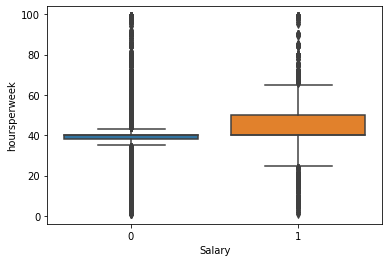

In [35]:
sns.boxplot(saltrain.Salary,saltrain.hoursperweek)

In [39]:
#hoursperweek is somehow classifying the data compared with other features

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='native'>

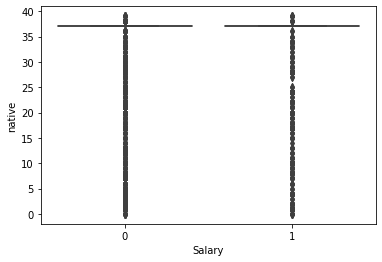

In [36]:
sns.boxplot(saltrain.Salary,saltrain.native)

In [40]:
#So out of all features only educationno and hoursperweek is classsifying the data. Still lets check once with the distribution curve

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

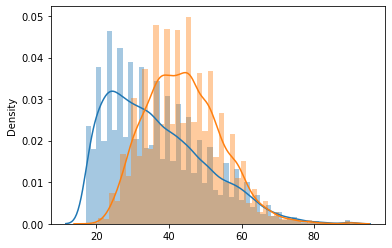

In [46]:
sns.distplot(saltrain[saltrain.Salary==0].iloc[::,0:1:])
sns.distplot(saltrain[saltrain.Salary==1].iloc[::,0:1:])

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='workclass', ylabel='Density'>

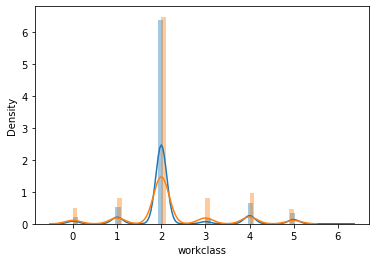

In [49]:
sns.distplot(saltrain[saltrain.Salary==0].iloc[::,1])
sns.distplot(saltrain[saltrain.Salary==1].iloc[::,1])

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='education', ylabel='Density'>

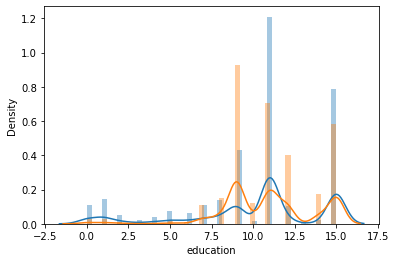

In [51]:
sns.distplot(saltrain[saltrain.Salary==0].iloc[:,2])
sns.distplot(saltrain[saltrain.Salary==1].iloc[:,2])

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

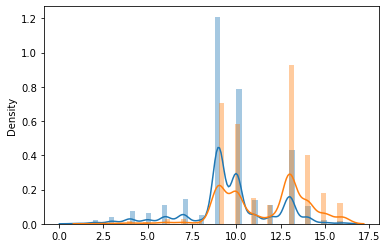

In [52]:
sns.distplot(saltrain[saltrain.Salary==0].iloc[::,3:4:])
sns.distplot(saltrain[saltrain.Salary==1].iloc[::,3:4:])

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

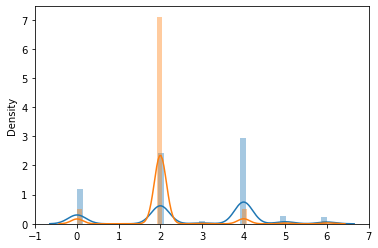

In [53]:
sns.distplot(saltrain[saltrain.Salary==0].iloc[::,4:5:])
sns.distplot(saltrain[saltrain.Salary==1].iloc[::,4:5:])

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

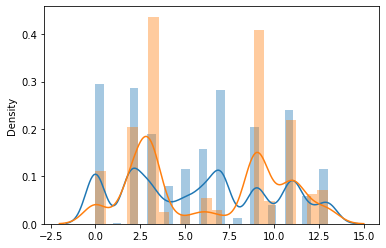

In [54]:
sns.distplot(saltrain[saltrain.Salary==0].iloc[::,5:6:])
sns.distplot(saltrain[saltrain.Salary==1].iloc[::,5:6:])

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

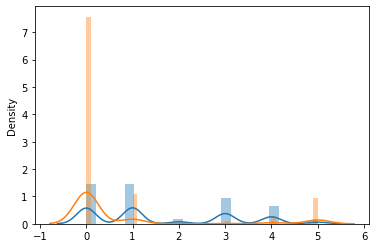

In [57]:
sns.distplot(saltrain[saltrain.Salary==0].iloc[::,6:7:])
sns.distplot(saltrain[saltrain.Salary==1].iloc[::,6:7:])

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

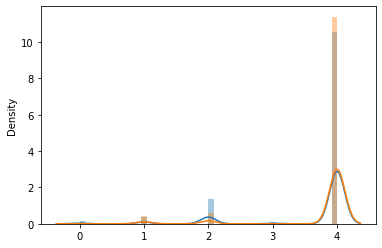

In [58]:
sns.distplot(saltrain[saltrain.Salary==0].iloc[::,7:8:])
sns.distplot(saltrain[saltrain.Salary==1].iloc[::,7:8:])

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

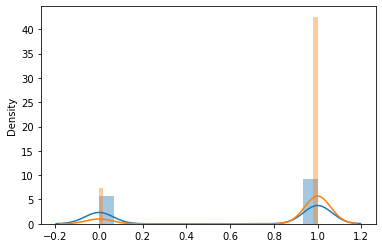

In [59]:
sns.distplot(saltrain[saltrain.Salary==0].iloc[::,8:9:])
sns.distplot(saltrain[saltrain.Salary==1].iloc[::,8:9:])

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

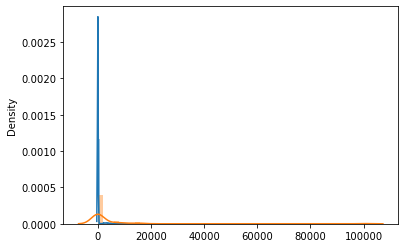

In [60]:
sns.distplot(saltrain[saltrain.Salary==0].iloc[::,9:10:])
sns.distplot(saltrain[saltrain.Salary==1].iloc[::,9:10:])

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

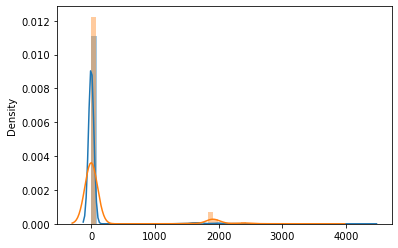

In [61]:
sns.distplot(saltrain[saltrain.Salary==0].iloc[::,10:11:])
sns.distplot(saltrain[saltrain.Salary==1].iloc[::,10:11:])

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

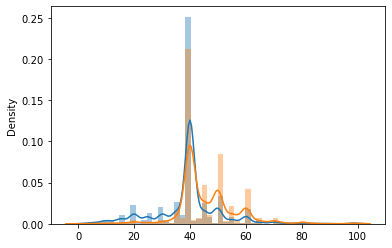

In [62]:
sns.distplot(saltrain[saltrain.Salary==0].iloc[::,11:12:])
sns.distplot(saltrain[saltrain.Salary==1].iloc[::,11:12:])

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

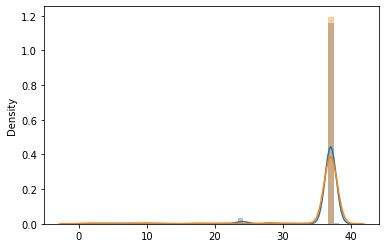

In [63]:
sns.distplot(saltrain[saltrain.Salary==0].iloc[::,12:13:])
sns.distplot(saltrain[saltrain.Salary==1].iloc[::,12:13:])

In [65]:
#Its not getting clear from the graph that which features are diving the data so lets take educationno and hoursperweek in consideration
#also it is clear that data is not following the normal distribution still we assume that it follows normal distribution for simplicity

In [66]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [67]:
xtrain = saltrain.iloc[::,3:12:]

In [68]:
xtrain

,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek
0,13,4,0,1,4,1,2174,0,40
1,13,2,3,0,4,1,0,0,13
2,9,0,5,1,4,1,0,0,40
3,7,2,5,0,2,1,0,0,40
4,13,2,9,5,2,0,0,0,40
...,...,...,...,...,...,...,...,...,...
30156,12,2,12,5,4,0,0,0,38
30157,9,2,6,0,4,1,0,0,40
30158,9,6,0,4,4,0,0,0,40
30159,9,4,0,3,4,1,0,0,20


In [71]:
xtrain = xtrain.drop(['maritalstatus','occupation','relationship','race','sex','capitalgain','capitalloss'],axis=1)

In [72]:
xtrain

,educationno,hoursperweek
0,13,40
1,13,13
2,9,40
3,7,40
4,13,40
...,...,...
30156,12,38
30157,9,40
30158,9,40
30159,9,20


In [74]:
ytrain = saltrain.iloc[::,13:14:]
ytrain

,Salary
0,0
1,0
2,0
3,0
4,0
...,...
30156,0
30157,1
30158,0
30159,0


In [76]:
saltest = pd.read_csv("SalaryData_Test.csv")
saltest

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [77]:
label_encoder = preprocessing.LabelEncoder()
saltest['workclass']= label_encoder.fit_transform(saltest['workclass'])
saltest['education']= label_encoder.fit_transform(saltest['education'])
saltest['workclass']= label_encoder.fit_transform(saltest['workclass'])
saltest['maritalstatus']= label_encoder.fit_transform(saltest['maritalstatus'])
saltest['occupation']= label_encoder.fit_transform(saltest['occupation'])
saltest['relationship']= label_encoder.fit_transform(saltest['relationship'])
saltest['race']= label_encoder.fit_transform(saltest['race'])
saltest['sex']= label_encoder.fit_transform(saltest['sex'])
saltest['native']= label_encoder.fit_transform(saltest['native'])
saltest['Salary']= label_encoder.fit_transform(saltest['Salary'])

In [78]:
saltest

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [80]:
xtest = saltest.iloc[::,3:12:]

In [81]:
xtest = xtest.drop(['maritalstatus','occupation','relationship','race','sex','capitalgain','capitalloss'],axis=1)

In [82]:
xtest

,educationno,hoursperweek
0,7,40
1,9,50
2,12,40
3,10,40
4,6,30
...,...,...
15055,13,40
15056,13,36
15057,13,50
15058,13,40


In [83]:
ytest = saltest.iloc[::,13:14:]
ytest

,Salary
0,0
1,0
2,1
3,1
4,0
...,...
15055,0
15056,0
15057,0
15058,0


In [75]:
#use bernaulli for this
model = BernoulliNB()
model =model.fit(xtrain,ytrain)

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [85]:
y_test_pred=model.predict(xtest)

In [86]:
from sklearn.metrics import accuracy_score

In [87]:
accuracy_score(ytest,y_test_pred)

0.7543160690571049

In [88]:
#lets try using all the features

In [89]:
model1 = BernoulliNB()
model1 =model.fit(saltrain.iloc[::,0:13:],saltrain.iloc[::,13:14:])

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [90]:
y_test_pred1=model1.predict(saltest.iloc[::,0:13:])
accuracy_score(ytest,y_test_pred1)

0.7284196547144755

In [91]:
#So we are getting more accuracy when two features are considered as compared to when all the features are considered for the Bernauli model
# Accuracy we got is close to 75% when only two features are considered

In [92]:
#lets try with other models in the naive bayes

In [94]:
#GaussianNB model
model2 = GaussianNB()
model2 =model2.fit(saltrain.iloc[::,0:13:],saltrain.iloc[::,13:14:])
y_test_pred2=model2.predict(saltest.iloc[::,0:13:])
accuracy_score(ytest,y_test_pred2)

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7946879150066402

In [96]:
#GaussianNB model 2
model3 = GaussianNB()
model3 =model3.fit(xtrain,ytrain)
y_test_pred3=model3.predict(xtest)
accuracy_score(ytest,y_test_pred3)

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7798140770252324

In [97]:
#We are getting more accuracy with gaussian considering all the features as compared to two features but still two features accuracy
# is giving close value with all the features accuracy

In [98]:
#MultinomialNB model
model4 = MultinomialNB()
model4 =model4.fit(xtrain,ytrain)
y_test_pred4=model4.predict(xtest)
accuracy_score(ytest,y_test_pred4)

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7543160690571049

In [99]:
#MultinomialNB model 2
model5 = MultinomialNB()
model5 =model5.fit(saltrain.iloc[::,0:13:],saltrain.iloc[::,13:14:])
y_test_pred5=model5.predict(saltest.iloc[::,0:13:])
accuracy_score(ytest,y_test_pred5)

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7749667994687915

In [100]:
#So GaussianNB model with all features is giving maximum accuracy as compared to other models